<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  INTRODUCTION
</div>

### <b> To build a Machine-Learning model to predict whether a person's income exceeds a certain threshold </b>

This is the data of Income evaluation for different countries. Based on the available features, build a model to predict whether a person's income exceeds a certain threshold (e.g. <=50K or >50K), which will help to identify the factors that contribute to higher incomes.


#### <b> The data contains 15 columns. Some of the following columns are: </b>

1. Age: The age of an employee
2. Work-class: Profession category 
3. Final_census : Census(population of the country)
4. Education: Type of last (max) Education
5. Education_num: Years spend on studies
6. Marital Status: Person married or not
7. Occupation: Person 
8. Relationship: Bounded by any relation or dependent 
9. Race: which ethnicity belongs to the employee 
10. Gender: gender of the employee
11. Capital-gain: Capital gain refers to the profit earned when selling a capital asset, such as stocks, real estate, or valuable possessions. It represents the difference between the selling price of the asset and its original purchase price.
12. Capital-loss: Capital loss refers to the financial loss incurred when selling a capital asset at a price lower than its original purchase price. It represents the negative difference between the selling price and the purchase price of the asset.
13. Hours/week : How many working hours in a week
14. Country : Country where it belongs
15. Income threshold(Target Column) : two range of Income one is <=50k and >50K


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.utils import resample
from scipy.stats import uniform, randint


from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

<a id="1"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  1. UNDERSTANDING THE DATASET
</div>

### 1.1 Loading the dataset and exploring its structure

In [2]:
df = pd.read_csv('C:/Users/Forza Motorsport/Desktop/2project/New folder/DS DATA.csv')

### 1.2 Removing unnecessary spaces between columns and data

In [3]:
df.columns = df.columns.str.strip()

In [4]:
for col in df.select_dtypes('object'):
    df[col] = df[col].str.lstrip()

In [5]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


### 1.3 Dropping unnecessary columns

In [6]:
df = df.drop('Unnamed: 15', axis = 1)

### 1.4 Checking the datatype and information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  country           32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 1.5 Checking duplicates

In [8]:
if df.duplicated().sum() == 0 :
    print ("There are no duplicate values present")

else :
    print (f"The data has {df.duplicated().sum()} values")

The data has 24 values


### 1.6 Checking null values

In [9]:
df.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
Education-num       0
marital-status      0
occupation          0
relationship        0
race                0
Gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
country             0
income              0
dtype: int64

In [10]:
print(df['capital-gain'].value_counts())

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
6097         1
1639         1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64


In [11]:
print(df['capital-loss'].value_counts())

capital-loss
0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2467        1
2163        1
2472        1
1411        1
Name: count, Length: 92, dtype: int64


### 1.7 To check count of '?' in dataset

In [12]:
print('Profession class :',df['Profession Class'].value_counts().get('?', 0))
print('Country :', df['country'].value_counts().get('?', 0))
print('Occupation:', df['occupation'].value_counts().get('?', 0))

Profession class : 1836
Country : 583
Occupation: 1843


### 1.8 Converting income '<=50K' and '>50K' to 0 and 1

In [13]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

### 1.9 Checking class balance

In [14]:
print(df['income'].value_counts())

income
0    24720
1     7841
Name: count, dtype: int64


### 1.10 Class Balance Percentage distribution

In [15]:
print(df['income'].value_counts(normalize=True) * 100)

income
0    75.919044
1    24.080956
Name: proportion, dtype: float64


### 1.11 Checking the shape of database

In [16]:
print (f"The database has {df.shape[0]} rows and {df.shape[1]} columns")

The database has 32561 rows and 15 columns


During exploration, we observed:

1. There are 24 Duplicate records present in the dataset.
2. We also dropped unnecessary columns from the dataset since they had lot of null values.
3. The following 'capital-gain' and 'capital-loss' contain null values in the form of '0'. Also the 'Profession class', 'occupancy' and 'country' contain null values in the form of '?'.
4. We replaced the labels with '1' for '>50K' and '0' for '<=50K'.
5. Class imbalance - The label '0' significantly outnumber label '1', which can bias predictions. People whose income is '<=50K' have 24720 records and people who dont have 7841 records. To handle these challenges, preprocessing steps included null value handling and class balancing using SMOTE (Synthetic Minority Oversampling Technique).

<a id="2"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  2. DATA PREPROCESSING
</div>

### 2.1 Removing Duplicates

In [17]:
df = df.drop_duplicates()

### 2.2 Replacing '?' with Nan

In [18]:
df['Profession Class'] = df['Profession Class'].replace('?', np.nan)

In [19]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [20]:
df['country'] = df['country'].replace('?', np.nan)

### 2.3 Replacing Capital Gain and Capital Loss '0' with nan values

In [21]:
df['capital-gain'] = df['capital-gain'].replace(0, np.nan)

In [22]:
df['capital-loss'] = df['capital-loss'].replace(0, np.nan)

### 2.4 Assigning Numerical Columns

In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).drop('income', axis=1).columns

### 2.5 Assigning Categorical Columns

In [24]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

### 2.6 Preprocessing the data

In [25]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Fitting the preprocessed data to dataset
X_preprocessed = preprocessor.fit_transform(df)

### BALANCING THE CLASSES USING SMOTE

### 2.7 Splitting the dataset into training and testing

In [26]:
X = df.drop(["income"], axis=1)
y = df["income"]

### 2.8 Model Building (Classification)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### 2.9 Fitting training data

In [28]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### 2.10 Using SMOTE (for balancing classes)

In [29]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

### 2.11 Checking the distribution of data

In [30]:
print(pd.Series(y_train_smote).value_counts())

income
0    19758
1    19758
Name: count, dtype: int64


<a id="3"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  3. EXPLORATORY DATA ANALYSIS
</div>

### 3.1 Correlation Heatmap

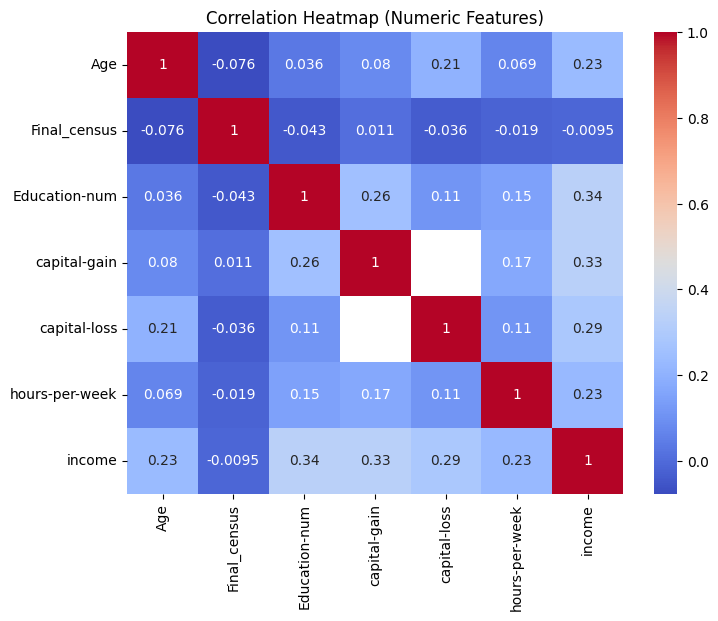

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols.tolist() + ['income']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

### 3.2 Finding most influential features

In [32]:
# Taking Random Forest Model
forest = RandomForestClassifier()
forest.fit(X_train_smote, y_train_smote)
forest_preds = forest.predict(X_test_processed)

# Get feature names after one-hot encoding
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)

# Combine numeric and encoded categorical feature names
feature_names = list(numeric_cols) + list(encoded_cat_features)

# Taking top 10 influential features
rf_importances = pd.Series(forest.feature_importances_, index=feature_names)
rf_top10 = rf_importances.sort_values(ascending=False).head(10)

print("\n🔹 Top 10 Most Influential Features (Random Forest):\n")
print(rf_top10)


🔹 Top 10 Most Influential Features (Random Forest):

Age                                  0.138288
Final_census                         0.113517
hours-per-week                       0.090706
marital-status_Married-civ-spouse    0.082022
relationship_Husband                 0.068778
Education-num                        0.064108
capital-gain                         0.059771
marital-status_Never-married         0.043039
occupation_Exec-managerial           0.020033
capital-loss                         0.017622
dtype: float64


### 3.3 Plotting graph for most influential features

C:\Users\Forza Motorsport\AppData\Local\Temp\ipykernel_1388\4044927201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf.values, y=top_rf.index, palette="viridis")


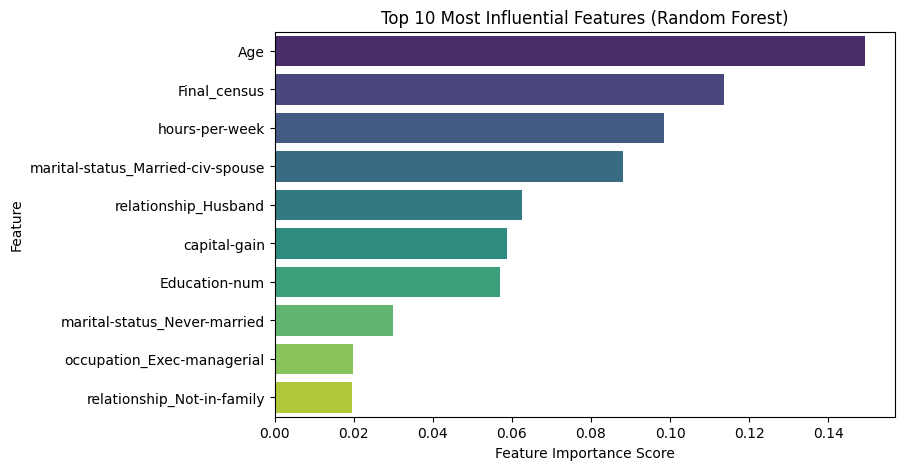

In [53]:
importances_rf = pd.Series(forest.feature_importances_, index=feature_names)
top_rf = importances_rf.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_rf.values, y=top_rf.index, palette="viridis")
plt.title("Top 10 Most Influential Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()


### 3.4 Plotting Graphs of features vs income

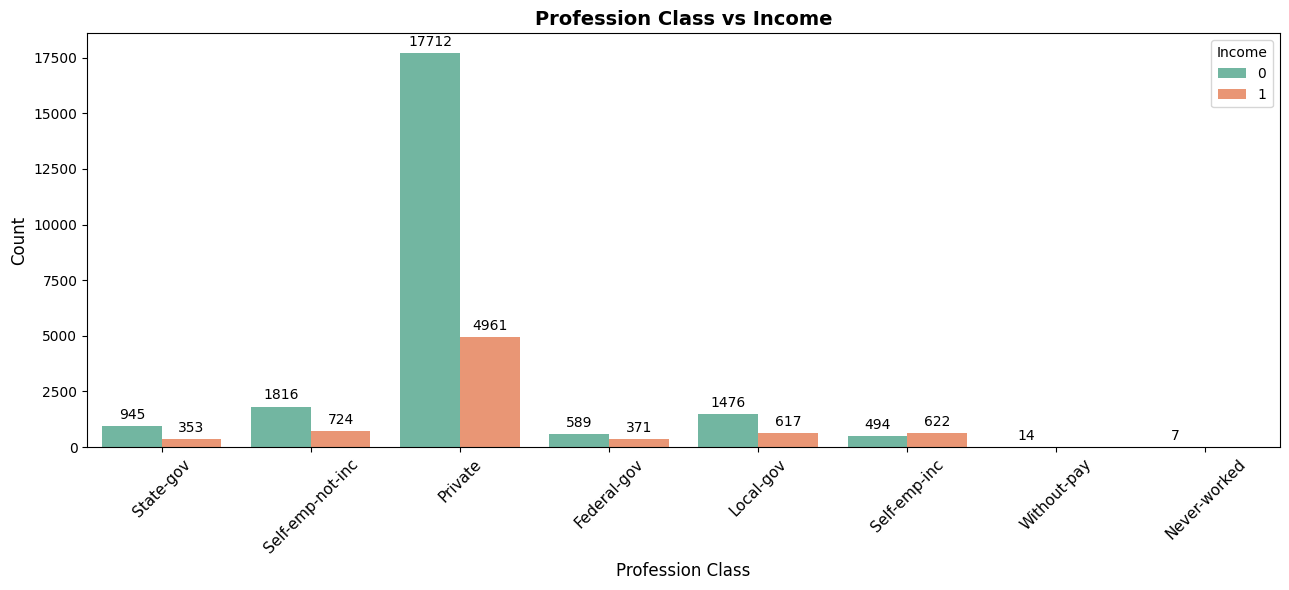

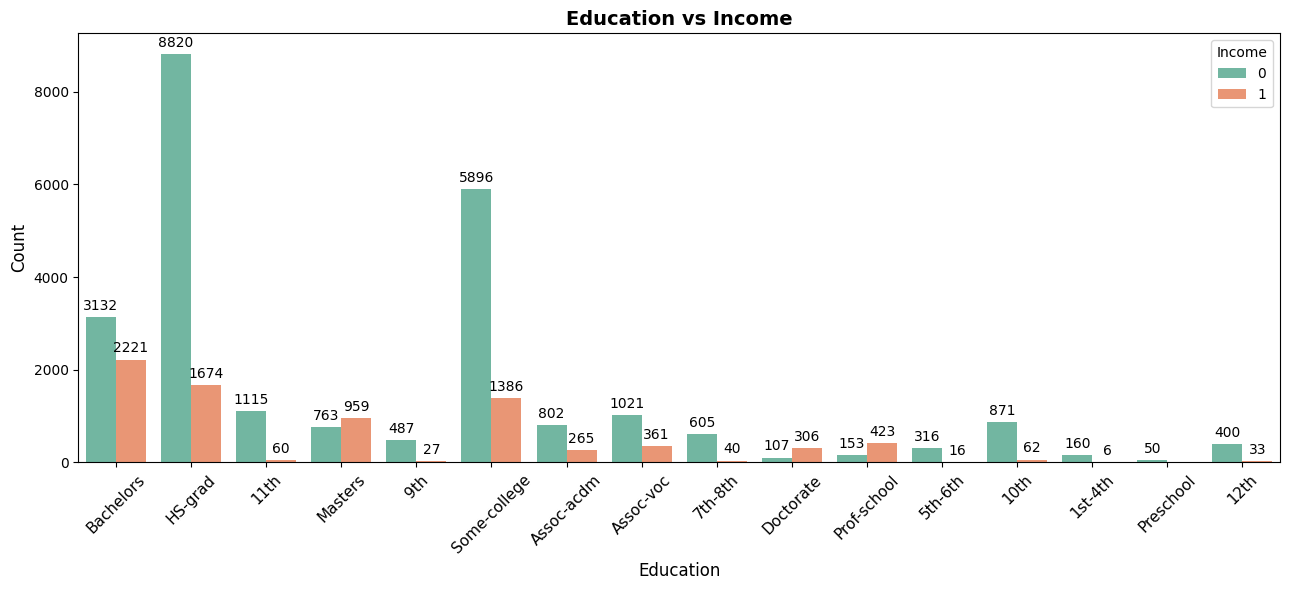

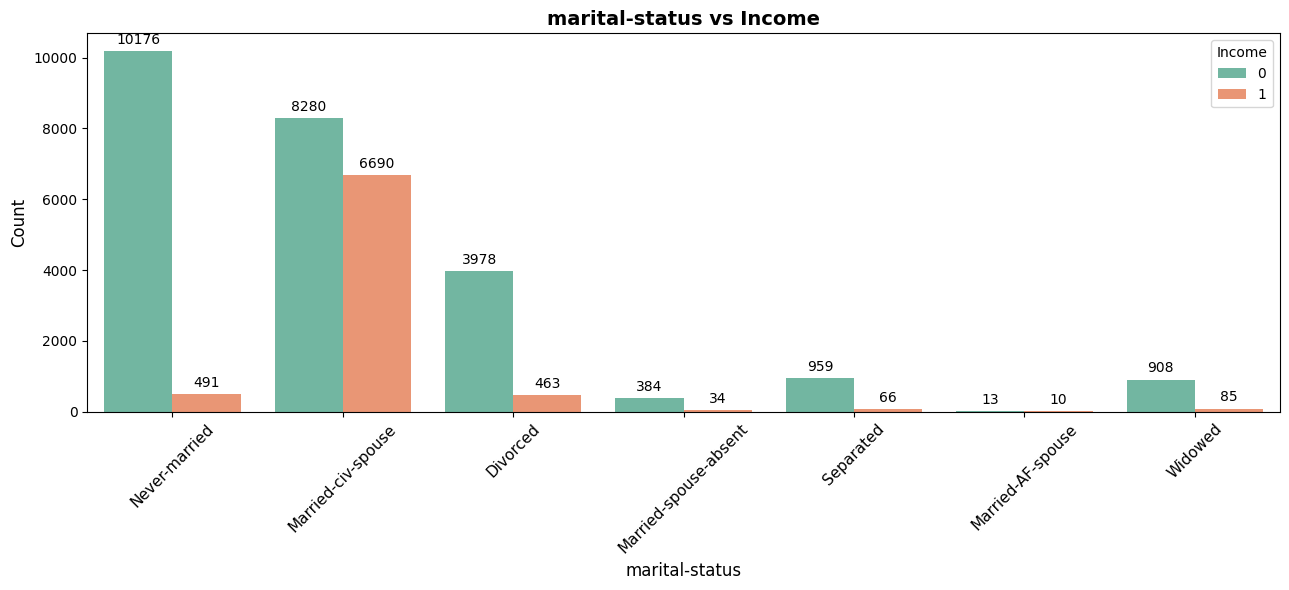

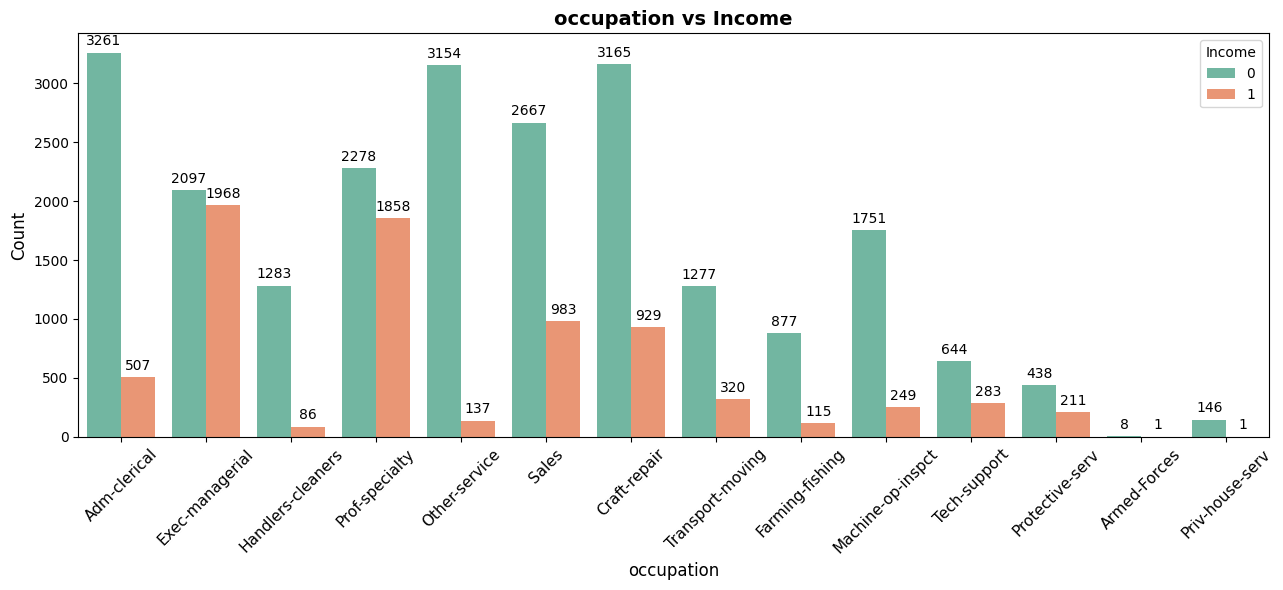

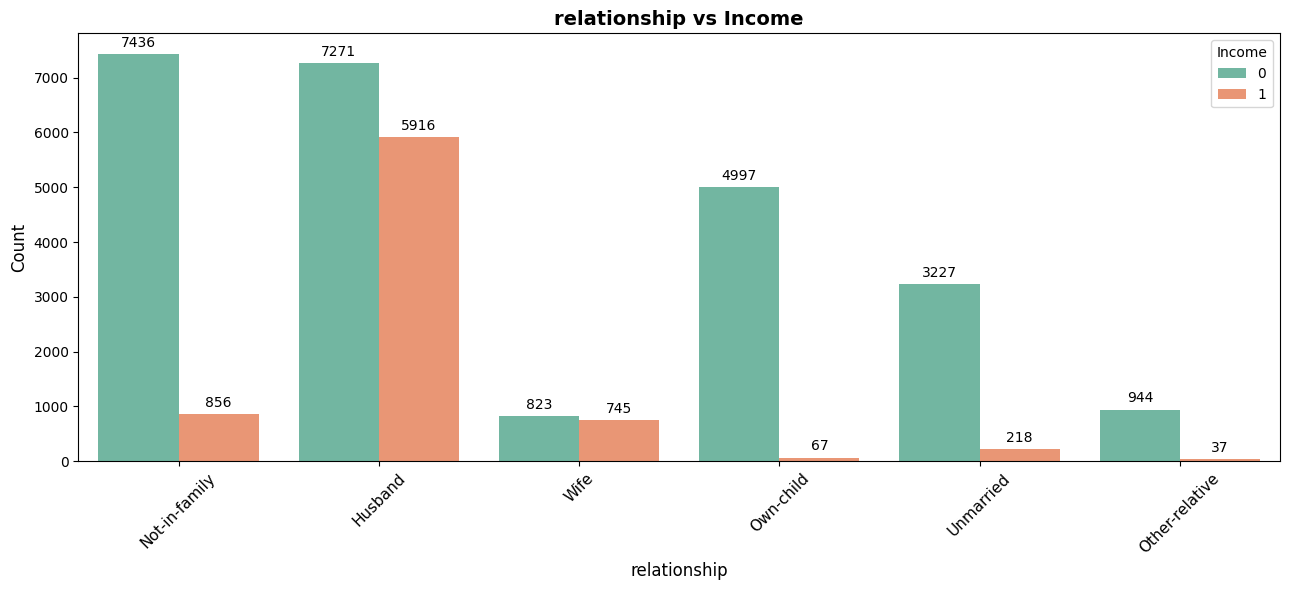

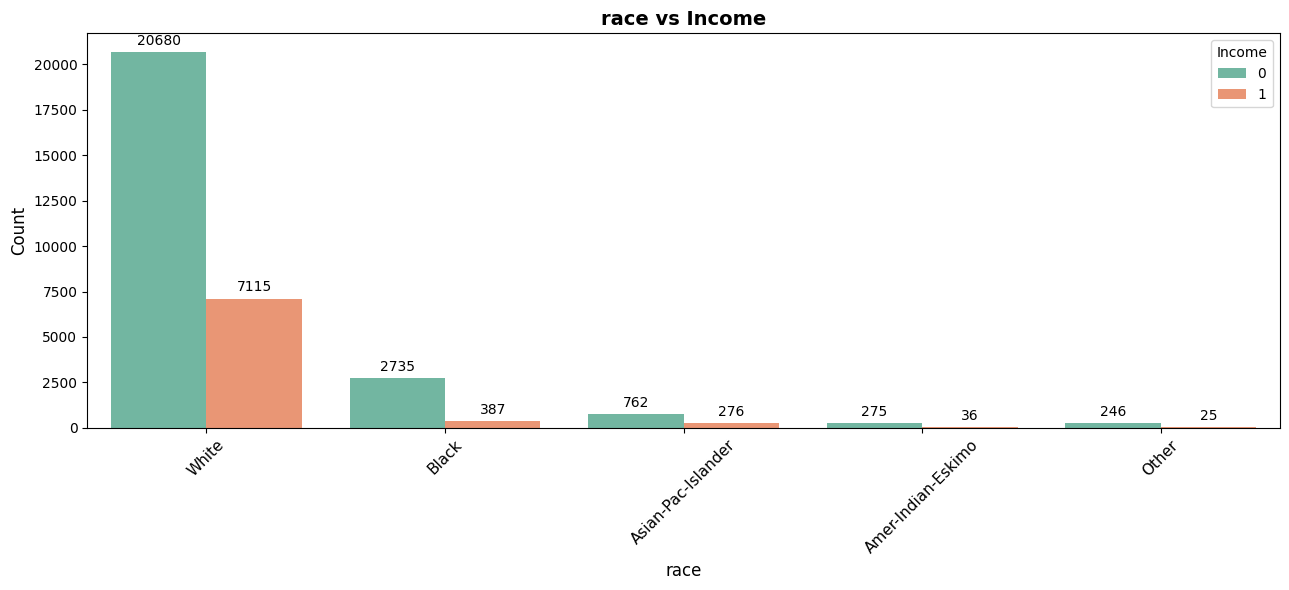

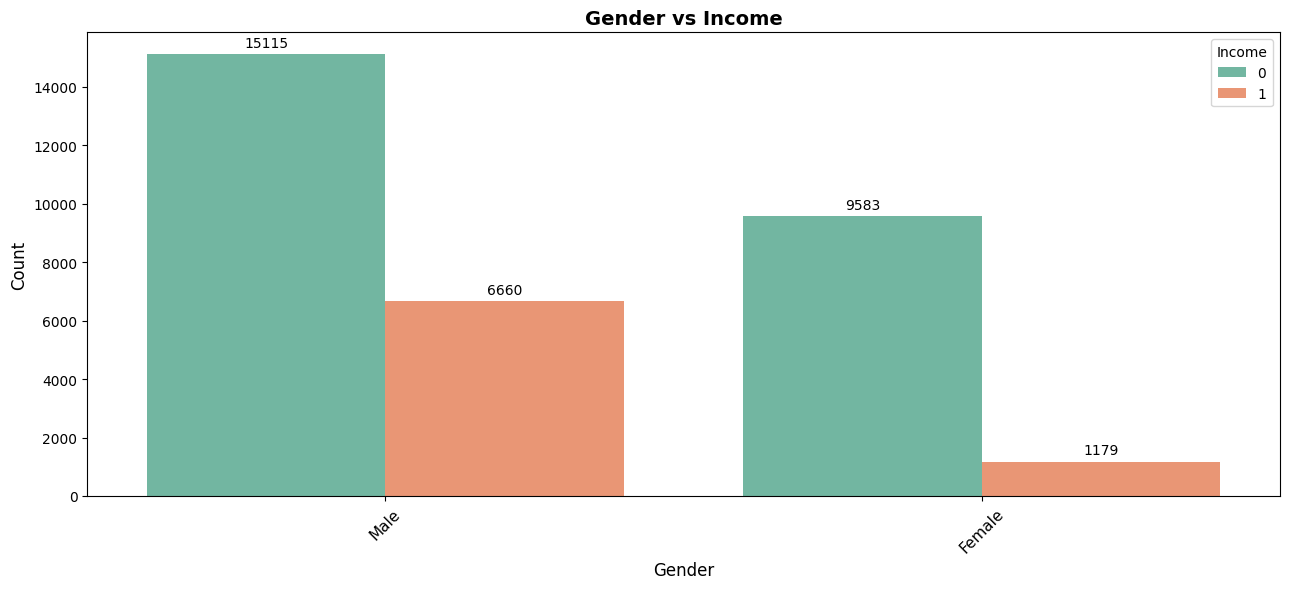

In [ ]:
for col in categorical_cols[:7]:
    plt.figure(figsize=(13,6)) 
    ax = sns.countplot(x=col, hue="income", data=df, palette="Set2")
    
    # Adding count labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
    
    plt.title(f"{col} vs Income", fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=10)
    plt.legend(title="Income", loc="upper right")
    plt.tight_layout()
    plt.show()


1. The plot shows that males have a significantly higher proportion in the income > 50K group, while females are mostly concentrated in the income ≤ 50K category.

2. Individuals with a married-civ-spouse status are predominantly found in the income > 50K category. In contrast, those who are never married, divorced, or separated are mostly in the income ≤ 50K group. This suggests that marital stability or being married may correlate with higher income levels.

3. People with higher education levels such as Bachelors, Masters, or Doctorate degrees tend to fall in the income > 50K category. Those with lower education (e.g., HS-grad, Some-college) mostly fall in income ≤ 50K. Hence, education plays a key role in determining income level - higher qualifications correspond to higher earning potential.

4. Occupations like Exec-managerial, Prof-specialty, and Tech-support have more individuals in the income > 50K group, whereas occupations such as Handlers-cleaners, Machine-op-inspct, and Other-service are concentrated in the income ≤ 50K range. This highlights that job type and skill level significantly influence earning potential

5. From the categorical analysis, it can be concluded that gender, marital status, education, and occupation have a strong influence on income level.
Males, married individuals, highly educated people, and those working in professional or managerial positions are more likely to have income greater than 50K, whereas individuals with lower education levels or working in service-based occupations mostly earn 50K or below.

<a id="4"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  4. MODEL SELECTION & TRAINING
</div>



### 4.1 Logisitc Regression

In [35]:
log_model = LogisticRegression()
log_model.fit(X_train_smote, y_train_smote)
log_preds = log_model.predict(X_test_processed)

### 4.2 Decision Tree

In [36]:
tree = DecisionTreeClassifier()
tree.fit(X_train_smote, y_train_smote)
tree_preds = tree.predict(X_test_processed)

### 4.3 Random Forest

In [37]:
forest = RandomForestClassifier()
forest.fit(X_train_smote, y_train_smote)
forest_preds = forest.predict(X_test_processed)

### 4.4 Gradient Boosting

In [38]:
gb = GradientBoostingClassifier()
gb.fit(X_train_smote, y_train_smote)
gb_preds = gb.predict(X_test_processed)

### 4.5 XGBoost

In [39]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote, y_train_smote)
xgb_preds = xgb.predict(X_test_processed)

### 4.6 Support Vector Classifier

In [40]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)
svm_preds = svm.predict(X_test_processed)

### 4.7 Comparing models based on accuracy, precision, recall, and F1-score

In [41]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.2f}")


evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)
evaluate_model("Random Forest", y_test, forest_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)
evaluate_model("XG Boost", y_test, xgb_preds)
evaluate_model("Support Vector Classifier", y_test, svm_preds)


Logistic Regression
Accuracy : 0.80
Precision: 0.55
Recall   : 0.85
F1-score : 0.67

Decision Tree
Accuracy : 0.80
Precision: 0.58
Recall   : 0.65
F1-score : 0.61

Random Forest
Accuracy : 0.84
Precision: 0.67
Recall   : 0.70
F1-score : 0.68

Gradient Boosting
Accuracy : 0.83
Precision: 0.61
Recall   : 0.83
F1-score : 0.71

XG Boost
Accuracy : 0.85
Precision: 0.67
Recall   : 0.77
F1-score : 0.72

Support Vector Classifier
Accuracy : 0.81
Precision: 0.57
Recall   : 0.86
F1-score : 0.69


<a id="5"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  5. MODEL EVALUATION
</div>

### 5.1 Confusion matrix to analyze false positives and false negatives.

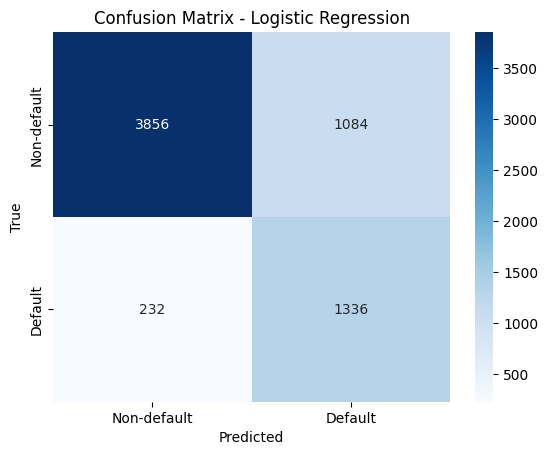

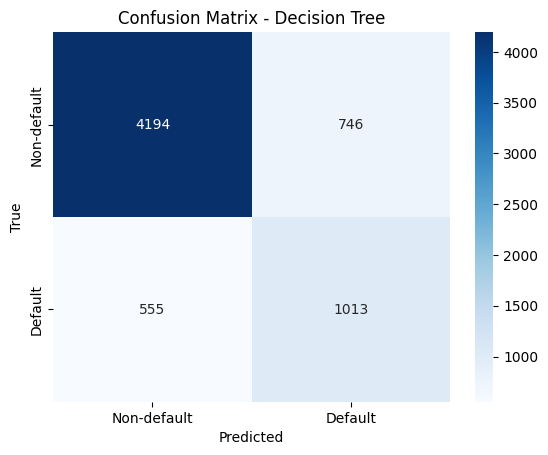

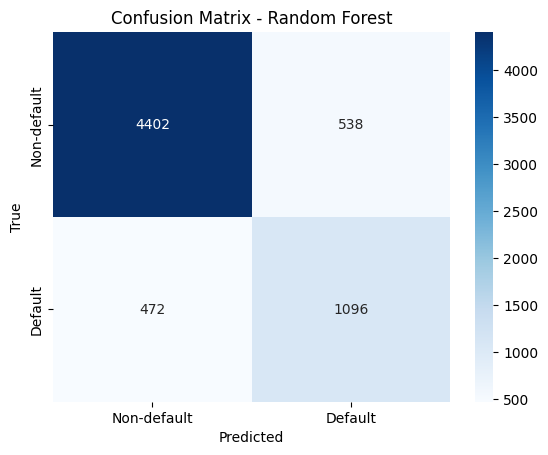

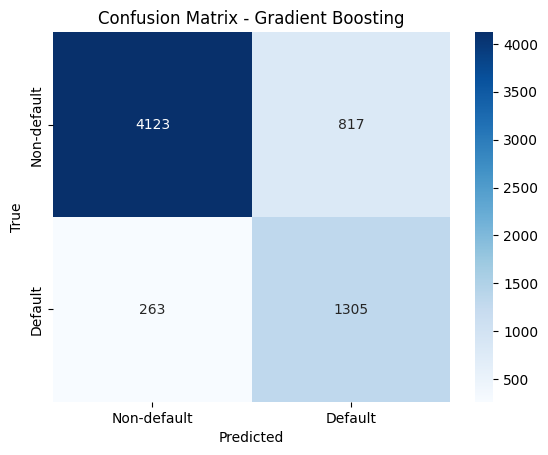

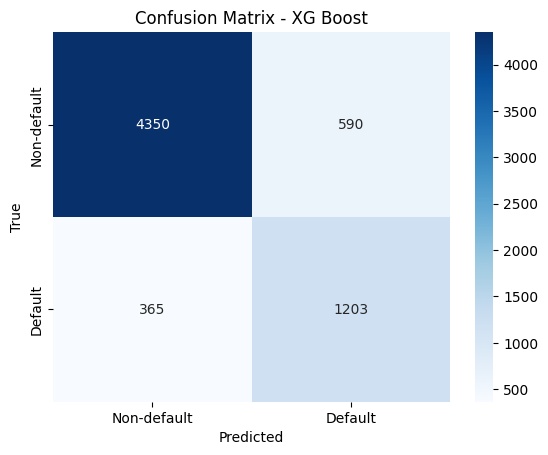

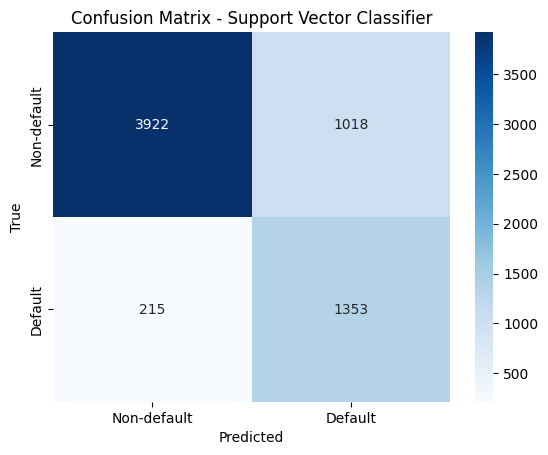

In [42]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-default", "Default"], yticklabels=["Non-default", "Default"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, log_preds, "Logistic Regression")
plot_confusion_matrix(y_test, tree_preds, "Decision Tree")
plot_confusion_matrix(y_test, forest_preds, "Random Forest")
plot_confusion_matrix(y_test, gb_preds, "Gradient Boosting")
plot_confusion_matrix(y_test, xgb_preds, "XG Boost")
plot_confusion_matrix(y_test, svm_preds, "Support Vector Classifier")

### 5.2 ROC-AUC to measure model performance

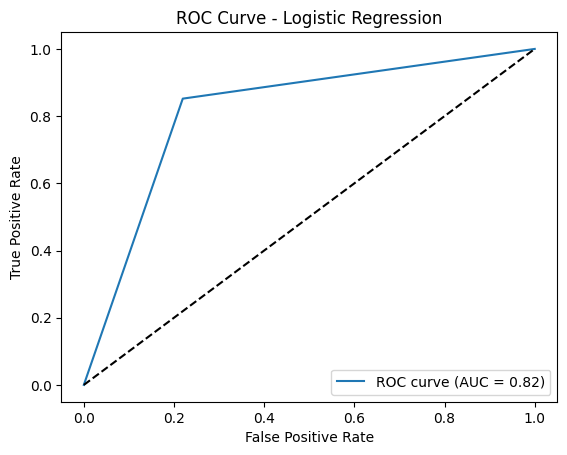

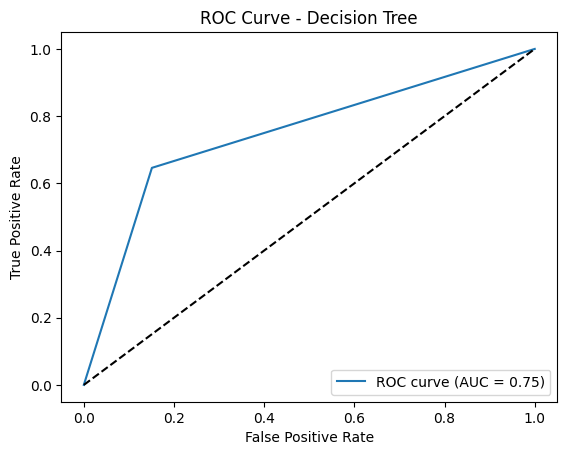

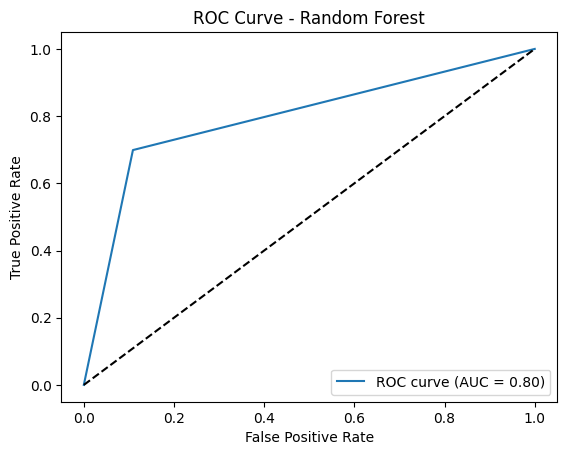

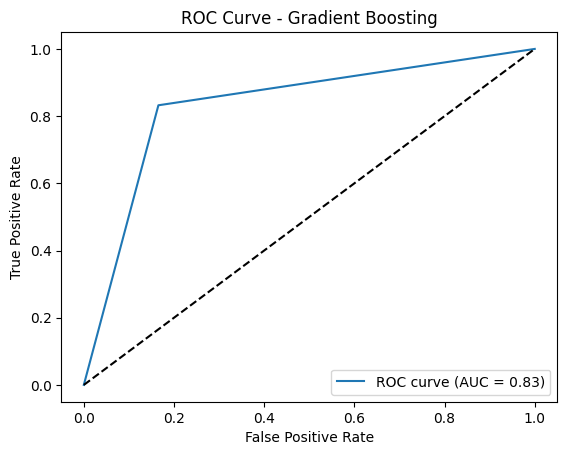

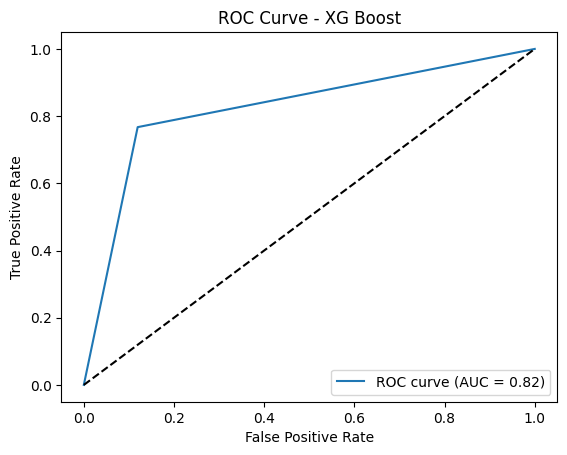

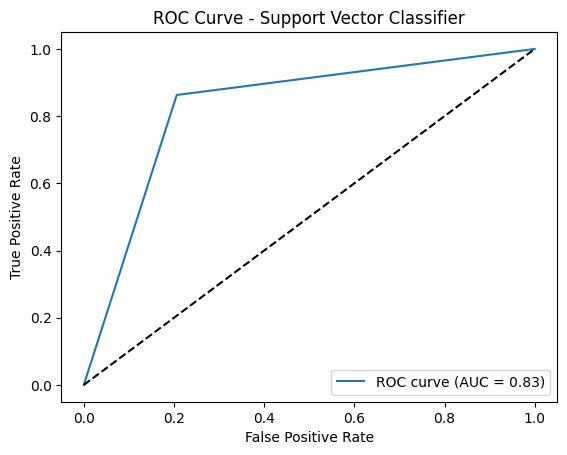

In [43]:
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each model
plot_roc_curve(y_test, log_preds, "Logistic Regression")
plot_roc_curve(y_test, tree_preds, "Decision Tree")
plot_roc_curve(y_test, forest_preds, "Random Forest")
plot_roc_curve(y_test, gb_preds, "Gradient Boosting")
plot_roc_curve(y_test, xgb_preds, "XG Boost")
plot_roc_curve(y_test, svm_preds, "Support Vector Classifier")

<a id="6"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  6. HYPERPARAMETER TUNING
</div>

### 6.1 Using RandomSearchCV for XGB Classifier to fine tune hyperparameters for the best model

In [44]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5, 1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 2, 3]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='f1', 
    n_iter=50,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_processed, y_train)
best_xgb = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)
print("Best F1-score:", random_search.best_score_)
random_preds = best_xgb.predict(X_test_processed)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best F1-score: 0.7008628981494018


### 6.2 Implementing Cross-Validation

In [51]:
scores = cross_val_score(xgb, X_train_processed, y_train, cv=5, scoring='f1')
print("F1-scores across folds:", scores)
print("Average F1-score:", scores.mean())

F1-scores across folds: [0.69962296 0.68432114 0.69886858 0.7002584  0.69729498]
Average F1-score: 0.6960732113435301


### 6.3 Comparing Results

In [46]:
# Compare to previous model
print("Before Tuning:")
print(classification_report(y_test, xgb_preds))

print("\nAfter Tuning:")
print(classification_report(y_test, random_preds))

Before Tuning:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4940
           1       0.67      0.77      0.72      1568

    accuracy                           0.85      6508
   macro avg       0.80      0.82      0.81      6508
weighted avg       0.86      0.85      0.86      6508


After Tuning:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4940
           1       0.76      0.67      0.71      1568

    accuracy                           0.87      6508
   macro avg       0.83      0.80      0.82      6508
weighted avg       0.87      0.87      0.87      6508



<a id="7"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  7. CONCLUSION
</div>

1. The dataset contains duplicate and null values, which were handled appropriately during preprocessing. Unnecessary columns were dropped and target labels were replaced with '1' for '>50K' and '0' for '<=50K'.

2. Class imbalance was addressed using SMOTE, enabling better detection of fraudulent transactions.

3. Exploratory analysis showed that columns such as 'Age', 'Final_census', 'hours-per-week' have stronger influence on 'Label' column. People with higher education levels such as Bachelors, Masters, or Doctorate degrees tend to fall in the '>50K' category. Those with lower education mostly fall in income '≤50K'. Hence, education plays a key role in determining income level, higher qualifications correspond to higher earning potential.

4. Models such as Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost and Support Vector Classifier were trained out of which XGBoost delivered the best performance with accuracy of 85%.

5. Hyperparameter tuning and cross-validation were applied to ensure robust, generalizable results which increase the accuracy to 87%.

6. The final model achieved 87% accuracy for label detection, making it suitable to predict whether a person's income exceeds a certain threshold or not.